## **Mugdha Gandhi**  
### **Task #2 : To predict the optimum number of clusters from iris dataset and represent it visually**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

### **Loading the dataset**

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Finding optimal number of clusters**

In [ ]:
x = iris_df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

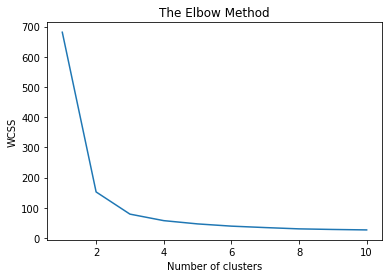

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Within cluster sum of squares (WCSS) doesn't decrease significantly after number of clusters = 3. That is elbow is at 3. Hence optimal number of clusters is 3.**

### **Applying k-means to the dataset**

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

### **Visualizing the clusters**

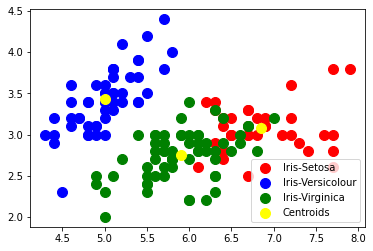

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Iris-Setosa')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Iris-Versicolour')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()